In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# To unzip 
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Notebooks/data2.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
# import the libraries as shown below
 
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.preprocessing import image
import os, time, shutil
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
 
train_path = '/content/data2/train'
valid_path = '/content/data2/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
 
Xception_model = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in Xception_model.layers:
    layer.trainable = False


In [ ]:
# useful for getting number of output classes
folders = glob('/content/data2/train/*')
folders

['/content/data2/train/0',
 '/content/data2/train/5',
 '/content/data2/train/3',
 '/content/data2/train/4',
 '/content/data2/train/2',
 '/content/data2/train/1']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(Xception_model.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
 
# create a model object
model = Model(inputs=Xception_model.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# opt = keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Checkpoint's 
# https://keras.io/api/callbacks/model_checkpoint/
 
filepath="model_Xception_acc-{epoch:02d}-{accuracy:.4f}-{loss:.4f}-{val_accuracy:.4f}-{val_loss:.4f}.h5"
filepath1="model_Xception_loss-{epoch:02d}-{accuracy:.4f}-{loss:.4f}-{val_accuracy:.4f}-{val_loss:.4f}.h5"
checkpoint = ModelCheckpoint(filepath, 
                            #  monitor='val_loss',
                             monitor='accuracy', 
                            #  verbose=1, 
                             save_best_only=True, 
                            #  mode='min'
                             )

checkpoint1 = ModelCheckpoint(filepath1, 
                            #  monitor='val_loss',
                             monitor='loss', 
                            #  verbose=1, 
                             save_best_only=True, 
                            #  mode='min'
                             )
callbacks_list = [checkpoint, checkpoint1]


In [ ]:
# Use the Image Data Generator to import the images from the dataset
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  #  shear_range = 0.1,
                                  #  zoom_range = 0.1,
                                   horizontal_flip = True)
 
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/data2/train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')
 
test_set = test_datagen.flow_from_directory('/content/data2/test',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')


Found 899 images belonging to 6 classes.
Found 222 images belonging to 6 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
 
start = time.time()
 
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks_list
)
print('\n\n')
print(f'Time: {time.time() - start}')
 
model.save('Xception_model.h5')


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
8/8 [==============================] - 169s 21s/step - loss: 7.6472 - accuracy: 0.4494 - val_loss: 6.9009 - val_accuracy: 0.4865


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
8/8 [==============================] - 147s 21s/step - loss: 3.0807 - accuracy: 0.6574 - val_loss: 3.3820 - val_accuracy: 0.6441
Epoch 3/20
8/8 [==============================] - 146s 21s/step - loss: 2.1598 - accuracy: 0.7653 - val_loss: 1.6860 - val_accuracy: 0.7793
Epoch 4/20
8/8 [==============================] - 149s 19s/step - loss: 0.7960 - accuracy: 0.8676 - val_loss: 1.2006 - val_accuracy: 0.7883
Epoch 5/20
8/8 [==============================] - 149s 21s/step - loss: 0.5077 - accuracy: 0.9032 - val_loss: 0.7417 - val_accuracy: 0.8649
Epoch 6/20
8/8 [==============================] - 146s 19s/step - loss: 0.2736 - accuracy: 0.9399 - val_loss: 0.7396 - val_accuracy: 0.8739
Epoch 7/20
8/8 [==============================] - 147s 19s/step - loss: 0.1609 - accuracy: 0.9644 - val_loss: 0.5943 - val_accuracy: 0.8919
Epoch 8/20
8/8 [==============================] - 152s 19s/step - loss: 0.1248 - accuracy: 0.9744 - val_loss: 0.4746 - val_accuracy: 0.8919
Epoch 9/20
8/8 [====

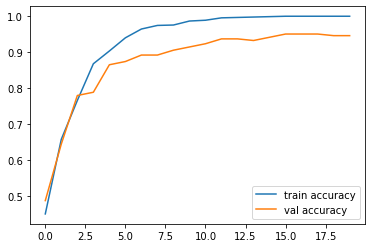

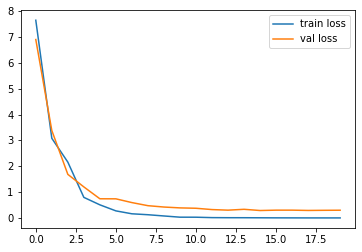

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.savefig('accuracy_and_val_accuracy.png', dpi=200)
plt.show()
 
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('loss_and_val_loss.png', dpi=200)
plt.show()


In [ ]:
from glob import glob
import os
 
model = load_model('/content/model_Xception_loss-20-1.0000-0.0014-0.9459-0.2991.h5')
model.summary()
 
data = []
labels = []
classes = glob('/content/data2/train/*') # data/train/* # data/test/*
print('Number of classes : ', classes)
cur_path = os.getcwd()
print('cur_path : ', cur_path)


from PIL import Image
 
# Retrieving the images and their labels 
for i in range(len(classes)):
    path = os.path.join(cur_path,'data2/train',str(i))
    print('path : ',path)
    images = os.listdir(path)
    # print('images : ',images)
    
    for a in images:
        try:
            image = Image.open(path + '/'+ a)            
            image = image.resize((224,224))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
print('loaded ...')

y_true = []
y_pred = []
 
for i in range(len(data)):
    x = data[i]
    x = np.expand_dims(x, axis=0)
    img_data = preprocess_input(x)
    classes = model.predict(img_data)
    li = list(classes[0])
    y_pred.append(li.index(max(li)))
    y_true.append(labels[i])
    
    # print('y_true : ', y_true[i], ' y_pred : ', y_pred[i])
 
print('done...')


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true,y_pred)
print(matrix, '\n')
 
# accuracy: (tp + tn) / (p + n)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %f' % accuracy, '\n')
print('Error rate: %f' % (1-accuracy), '\n')
 
from sklearn.metrics import classification_report
print("classification_report \n\n", classification_report(y_true,y_pred), '\n')
 
# kappa
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_true,y_pred)
print('Cohens kappa: %f' % kappa)
 
# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns 
 
# plt.rcParams['font.size'] = 20
# bg_color = (0,0.77,0.77)
# plt.rcParams['figure.facecolor'] = bg_color
# plt.rcParams['axes.facecolor'] = bg_color
 
# fig, ax = plt.subplots(1)
 
# plt.text(1,-.3, "Confusion Matrix", fontsize = 25, color='Black', fontstyle='italic')
 
# ax = sns.heatmap(matrix, annot=True, annot_kws={'size':15}, fmt="d", 
#                  robust=True, linewidths=.9, cmap="RdYlBu", square=True)
# # vmin=0, vmax=350,
# plt.savefig("model_VGG19.jpeg", dpi=200, facecolor=bg_color, transparent=True)
# plt.show()


[[149   0   0   0   0   0]
 [ 10 140   0   0   0   0]
 [  1   2 147   0   0   0]
 [  0   0   0 150   0   0]
 [  2   0   0   0 148   0]
 [  0   0   0   0   0 150]] 

Accuracy: 0.983315 

Error rate: 0.016685 

classification_report 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96       149
           1       0.99      0.93      0.96       150
           2       1.00      0.98      0.99       150
           3       1.00      1.00      1.00       150
           4       1.00      0.99      0.99       150
           5       1.00      1.00      1.00       150

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899
 

Cohens kappa: 0.979978


In [ ]:
# !rm -r *.h5
# !rm -r *.zip
# !rm -r 0 1 2 3 4 5 
# !rm -r data1

# !mkdir 0
# !mkdir 1
# !mkdir 2
# !mkdir 3
# !mkdir 4
# !mkdir 5

# !zip -r '00_test.zip' '0'
# !zip -r '11_test.zip' '1'
# !zip -r '22_test.zip' '2'
# !zip -r '33_test.zip' '3'
# !zip -r '44_test.zip' '4'
# !zip -r '55_test.zip' '5'

In [ ]:

from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import os, time
import shutil
from glob import glob

import datetime
time_start = datetime.datetime.now()

co = 0
allName = {
	0:'0',
  1:'1',
  2:'2',
  3:'3',
  4:'4',
  5:'5'
	}
model = load_model('/content/drive/MyDrive/Colab Notebooks/model_vgg16-12-0.971-0.153.h5')

entries = os.listdir('/content/data_64/train')
print(entries)

for i in entries:
  # path = sorted(glob('data/train/'+i))
  path = 'data_64/train/'+i
  # Datasets\train\0 No_DR
  # print('path : '+path, '\t\t class : ',i)
  img_list = os.listdir(path)
  # print('img_list : ',img_list)
  for img_name in img_list:
    img_path = path+'/'+img_name
    # print('img_path : ', img_path, '\n \t\t path : ',int(path[-1]))
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    img_data = preprocess_input(x)
    classes = model.predict(img_data)
    li = list(classes[0])
    # for i in range(len(li)):
    #   print(i,' : ', li[i]*100, '% .')
#     # print('\n\n')
    Name = allName.get(np.argmax(li))
    # print('Name of class prediction : ',Name, '\n\n')
    co = str(co)
    to =  str(Name)+'/'+str(co)+'_'+img_name
    if int(path[-1]) == int(Name):
      dest = shutil.copyfile(img_path, to)
      # print('copy : ', path, ' to : ', to, ' dest : ', dest)
      # print('copy : ', img_path, ' to : ', to)
      co = int(co)
      # print('Co : ', co)
      co+=1
    
    # time.sleep(.1)

time_end = datetime.datetime.now()

print ('Time to run all : ', time_end - time_start)

print('Done ...')



['0', '5', '3', '4', '2', '1']
Time to run all :  0:53:40.547271
Done ...
